## Description about the Dataset (JELLY FISH)

**The dataset is an image classification dataset organized into subfolders, where each subfolder represents a unique class label. Each class contains multiple images, which are resized to 512×512 pixels and preprocessed for feature extraction. The dataset is used to extract HOG features and classify images using SVM and Naive Bayes.**

In [10]:

import os

# Set the dataset path to 'archive', your parent folder
dataset_path = "archive"

# Check if the folder exists
if os.path.exists(dataset_path):
    print("Folder found:", dataset_path)
    print("Available classes:")
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            print(" -", class_name)
else:
    print(" Folder not found. Check the folder name and path.")


Folder found: archive
Available classes:
 - Train_Test_Valid
 - mauve_stinger_jellyfish
 - barrel_jellyfish
 - Moon_jellyfish
 - lions_mane_jellyfish
 - compass_jellyfish
 - blue_jellyfish


In [13]:
!pip install opencv-python


 ## 1. Preprocessing the Image Dataset

In [15]:
import os
import cv2
import numpy as np

dataset_path = "archive"  # your main dataset folder
img_size = (512, 512)

images = []
labels = []

# Loop through subfolders (classes)
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img_gray = img_gray / 255.0  # normalize
                    images.append(img_gray)
                    labels.append(class_name)

print("✅ Preprocessing complete")
print(f"Total images: {len(images)}")
print(f"Classes: {set(labels)}")


✅ Preprocessing complete
Total images: 900
Classes: {'blue_jellyfish', 'mauve_stinger_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'Moon_jellyfish', 'barrel_jellyfish'}


## 2. Feature Extraction using HOG (Histogram of Oriented Gradients)



In [19]:
!pip install scikit-image
from skimage.feature import hog

In [20]:
from skimage.feature import hog

features = []
hog_images = []

for img in images:
    hog_feat, hog_img = hog(img, orientations=9, pixels_per_cell=(16, 16),
                            cells_per_block=(2, 2), block_norm='L2-Hys',
                            visualize=True)
    features.append(hog_feat)
    hog_images.append(hog_img)

features = np.array(features)

print("✅ HOG feature extraction complete")
print(f"HOG feature vector size: {features[0].shape}")


✅ HOG feature extraction complete
HOG feature vector size: (34596,)


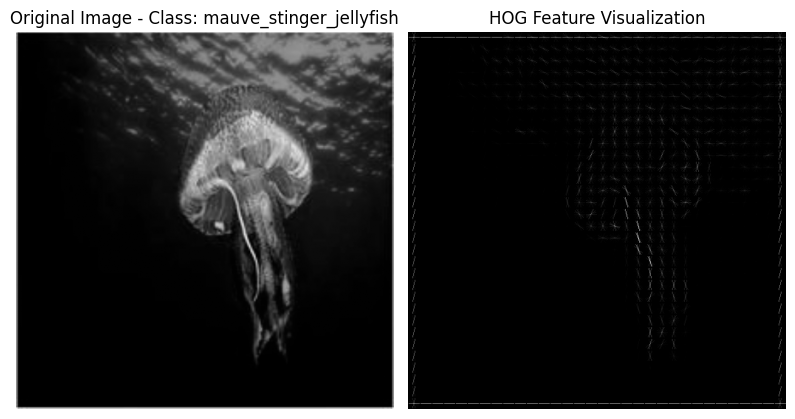

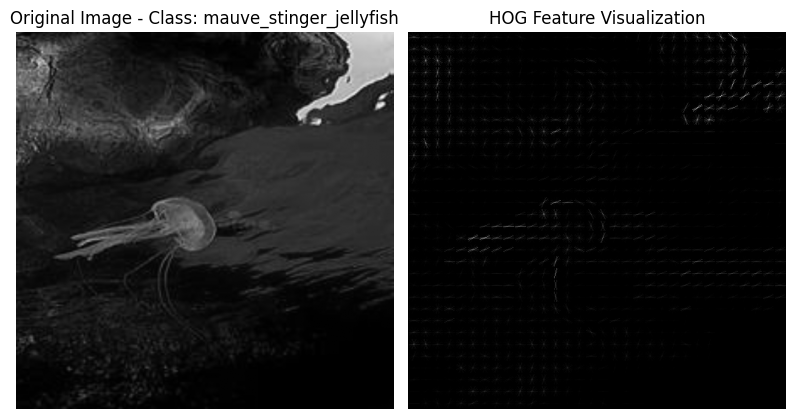

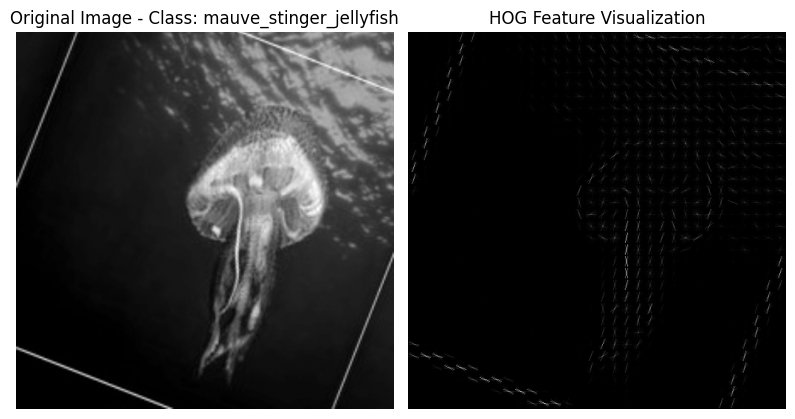

In [32]:
import matplotlib.pyplot as plt

# Visualize the first 3 images and their HOG representations
for i in range(3):
    plt.figure(figsize=(8, 6))

    # Original grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Original Image - Class: {labels[i]}")
    plt.axis('off')

    # HOG feature image
    plt.subplot(1, 2, 2)
    plt.imshow(hog_images[i], cmap='gray')
    plt.title("HOG Feature Visualization")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## Image Classification using SVM

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode string labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    features, encoded_labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_preds = svm_model.predict(X_test)
print("🎯 SVM Classification Report:")
print(classification_report(y_test, svm_preds, target_names=le.classes_))


🎯 SVM Classification Report:
                         precision    recall  f1-score   support

         Moon_jellyfish       0.63      0.65      0.64        34
       barrel_jellyfish       0.68      0.61      0.64        28
         blue_jellyfish       0.53      0.71      0.61        28
      compass_jellyfish       0.29      0.40      0.34        25
   lions_mane_jellyfish       0.79      0.58      0.67        33
mauve_stinger_jellyfish       0.58      0.44      0.50        32

               accuracy                           0.57       180
              macro avg       0.58      0.56      0.57       180
           weighted avg       0.60      0.57      0.57       180



**Inference:SVM: Achieved 57% accuracy, performing best on lions_mane_jellyfish and Moon_jellyfish, but struggled with compass_jellyfish (low precision and recall).**

## Image Classification using Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_preds = nb_model.predict(X_test)
print("🎯 Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds, target_names=le.classes_))


🎯 Naive Bayes Classification Report:
                         precision    recall  f1-score   support

         Moon_jellyfish       0.40      0.47      0.43        34
       barrel_jellyfish       0.37      0.39      0.38        28
         blue_jellyfish       0.41      0.43      0.42        28
      compass_jellyfish       0.29      0.32      0.30        25
   lions_mane_jellyfish       0.71      0.52      0.60        33
mauve_stinger_jellyfish       0.34      0.31      0.33        32

               accuracy                           0.41       180
              macro avg       0.42      0.41      0.41       180
           weighted avg       0.43      0.41      0.42       180



In [ ]:
Inference:Naive Bayes: Achieved 41% accuracy, showing weaker performance overall with lower scores across all classes, indicating it less suitable for this dataset.**

/home/student/mlm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


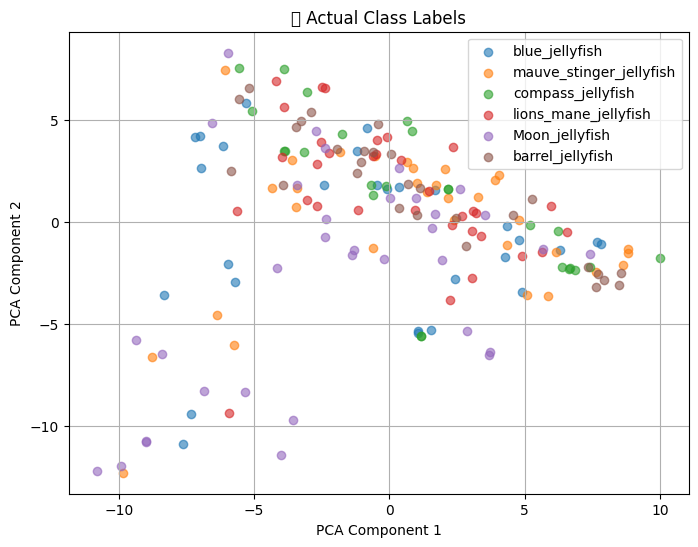

/home/student/mlm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


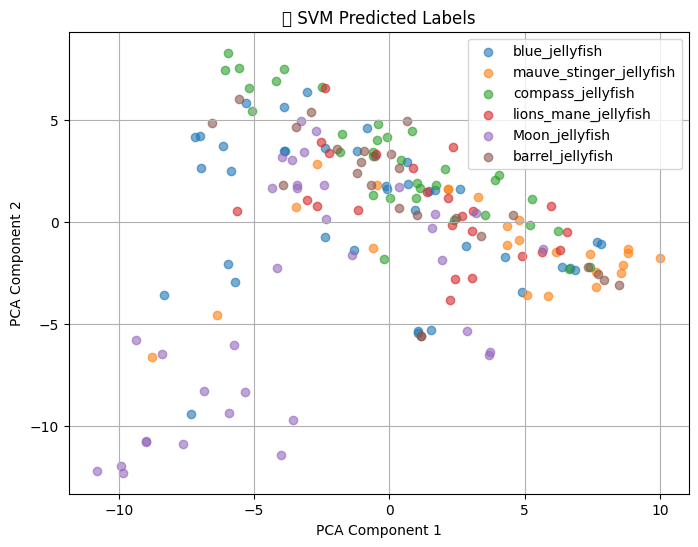

/home/student/mlm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


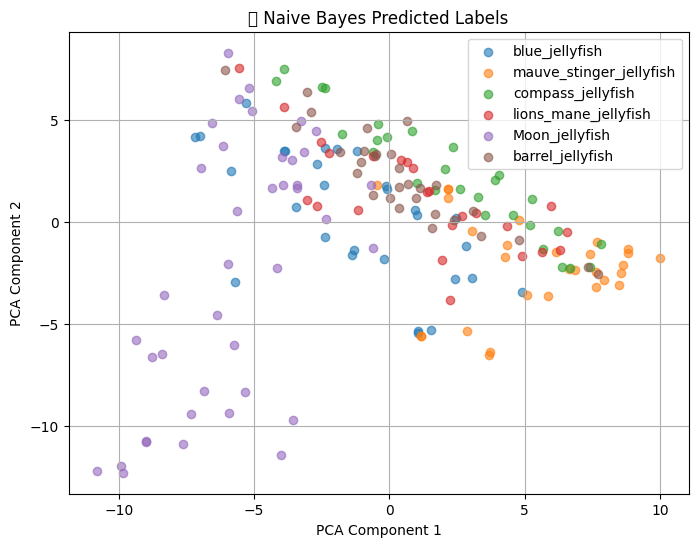

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Reduce HOG features to 2D for visualization
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

# Step 2: Decode labels
actual_labels = le.inverse_transform(y_test)
svm_labels = le.inverse_transform(svm_preds)
nb_labels = le.inverse_transform(nb_preds)

# Step 3: Scatter plot function
def plot_scatter(X, labels, title):
    plt.figure(figsize=(8, 6))
    for label in set(labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(X[indices, 0], X[indices, 1], label=label, alpha=0.6)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Visualize
plot_scatter(X_test_2D, actual_labels, "🔵 Actual Class Labels")
plot_scatter(X_test_2D, svm_labels, "🔴 SVM Predicted Labels")
plot_scatter(X_test_2D, nb_labels, "🟢 Naive Bayes Predicted Labels")
